# Brief - Les modèles dans tous leurs états

### Tutoriel 2 - Le dataset California Housing & la régression linéaire

Dans ce deuxième tutoriel, nous allons aborder un cas de régression linéaire. A travers un dataset fourni "california housing", il nous faut estimer le prix d'un bien à partir des paramètres d'entrée. 

Là encore, mettons en place notre environnement de travail avec les librairies adéquates.

In [43]:
# Import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

###### Analyse du dataset

On importe notre dataset et on regarde sa description.

In [44]:
california_housing = fetch_california_housing(as_frame=True)

In [45]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Les biens en question possèdent plusieurs caractéristiques. Voici à quoi correspondent les attributs :
- MedInc : le revenu médian dans le groupe
- HouseAge : âge médian de la maison dans le groupe d'îlots
- AveRooms : nbre moyen de pièces par ménage
- AveBdrms : nbre moyen de chambres par ménage
- AveOccup : nbre de personnes dans le ménage

Par souci de lisibilité, on peut aussi afficher le dataset sous forme d'un dataframe

In [46]:
california_housing = california_housing.frame
california_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Ici, nous avons plusieurs variables et attributs à comparer et qui peuvent rentrer en compte lors de l'estimation du bien. Nous pouvons avoir une visualisation de ces données à travers plusieurs visuels que nous offre la librairie Matplotlib, et comparer les différentes valeurs.

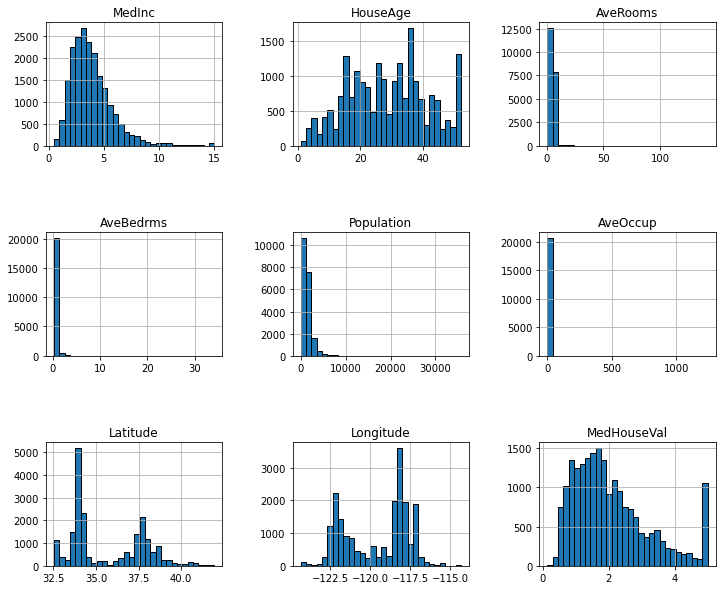

In [47]:
california_housing.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Cette première visualisation nous aide aussi à voir des potentiels données aberrantes. Par exemple, si le nombre de pièces ou de chambres montraient des valeurs négatives, nous aurions dû éliminer ces données pour une meilleure étude du set.

Afin de mesurer tous ces paramètres, nous allons faire une carte de chaleur (ou heatmap) et voir une corrélation ou non (ce qui sera plus rapide que les nuages de points, qui permettent de faire un parallèle entre deux valeurs). C'est le choix le plus judicieux dans un cas de régression linéaire.

<AxesSubplot:>

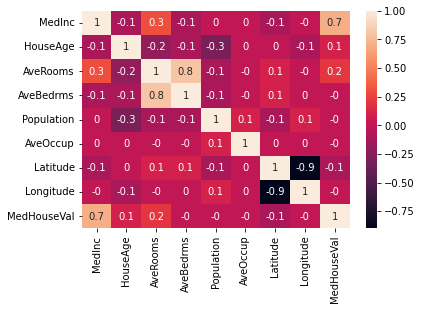

In [48]:
# Etude de la corrélation
matrice_corr = california_housing.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

A partir de cette heatmap, nous voyons des corrélations apparaître plus simplement. Nous aurons à nous positionner en fonction de notre valeur de référence, ici "MedHouseVal" (qui ce pour quoi nous cherchons à faire une régression linéaire).
La valeur d'un bien a une forte corrélation avec le revenu moyen d'un ménage et une corrélation plus modérée avec le nombres de pièces. Egalement, relevons la valeur Latitude, qui partage une corrélation des plus négatives.

Nous retiendrons donc comme paramètres "MedInc", "AveRooms" et "Latitude".

In [49]:
#on utilise seulement 3 variables explicatives
X=pd.DataFrame(
    np.c_[california_housing['MedInc'],
          california_housing['AveRooms'],
          california_housing['Latitude']], 
    columns = ['MedInc','AveRooms','Latitude']
)
Y = california_housing['MedHouseVal']

ValueError: 'c' argument has 20640 elements, which is inconsistent with 'x' and 'y' with size 1.

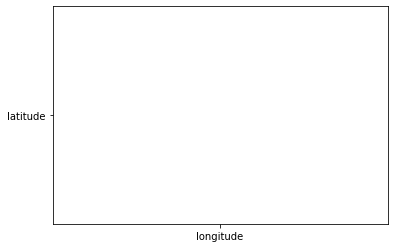

In [54]:
#plt.scatter(data = california_housing , x="longitude" , y="latitude" , c =california_housing["MedHouseVal"])
#plt.show()

###### Mise en place du modèle d'apprentissage

Comme pour le tutoriel précédent, et pour un apprentissage supervisé encore une fois, nous aurons besoin de faire deux groupes : les données d'apprentissage et les données de test, pour un ratio 80% - 20%.

In [ ]:
#base d'apprentissage et base de test
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
# phase d'entraînement
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

###### Evaluation du modèle

Maintenant, il est temps de faire un test de notre modèle. Ici, on va utiliser deux métriques car nous avons paramètres à évaluer : le R-square et l'erreur quadratique moyenne.

In [ ]:
# Evaluation du training set
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation du testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

###### Application de l'algorithme

In [ ]:
def predict(x):
   return slope * x + intercept

In [ ]:
fitLine = predict(X)
plt.plot(X, fitLine, c='r')